In [88]:
 # importing dependencies
 import pandas as pd
 import numpy as np
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import LogisticRegression
 from sklearn.metrics import accuracy_score
 from sklearn.preprocessing import StandardScaler

In [89]:
data= pd.read_csv("/content/Telco-Customer-Churn.csv")

In [90]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


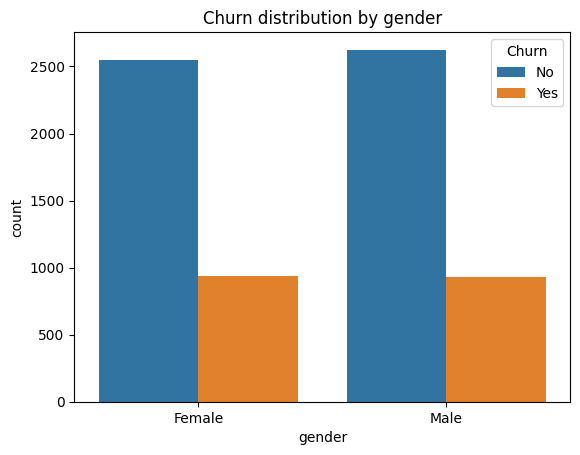

In [91]:
# Plotting the number of males and females based in the Churn
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='gender', hue='Churn')
plt.title('Churn distribution by gender')
plt.show()


In [92]:
# Dropping unnecessary data
data=data.drop(['customerID','gender'],axis=1)

In [93]:
data.head(10)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [94]:
data['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5901
1,1142


In [120]:
data['Churn'].value_counts(normalize=True)


,proportion
Churn,
0,0.73463
1,0.26537


In [95]:
data.isnull().sum()

,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


In [96]:
data.replace(['No internet service', 'No phone service'], 'No', inplace=True)

# Binary columns list
binary_cols = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn',
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies']

# Map Yes→1, No→0
for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})


In [97]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [98]:
# Applying label Encoding
import pandas as pd
data = pd.get_dummies(data, columns=['Contract', 'PaymentMethod', 'InternetService'], drop_first=True)


In [99]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,0,1,0,1,0,0,0,1,0,0,...,29.85,29.85,0,False,False,False,True,False,False,False
1,0,0,0,34,1,0,1,0,1,0,...,56.95,1889.5,0,True,False,False,False,True,False,False
2,0,0,0,2,1,0,1,1,0,0,...,53.85,108.15,1,False,False,False,False,True,False,False
3,0,0,0,45,0,0,1,0,1,1,...,42.30,1840.75,0,True,False,False,False,False,False,False
4,0,0,0,2,1,0,0,0,0,0,...,70.70,151.65,1,False,False,False,True,False,True,False


In [100]:
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)


In [101]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,0,1,0,1,0,0,0,1,0,0,...,29.85,29.85,0,0,0,0,1,0,0,0
1,0,0,0,34,1,0,1,0,1,0,...,56.95,1889.5,0,1,0,0,0,1,0,0
2,0,0,0,2,1,0,1,1,0,0,...,53.85,108.15,1,0,0,0,0,1,0,0
3,0,0,0,45,0,0,1,0,1,1,...,42.30,1840.75,0,1,0,0,0,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,70.70,151.65,1,0,0,0,1,0,1,0


In [102]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)  # Replace blank with NaN
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [103]:
# Convert to numeric (force errors='coerce' will convert invalid entries to NaN)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Fill NaN with median
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())


In [104]:
x= data.drop('Churn',axis=1)
y= data['Churn']

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [106]:
non_numeric_cols = x_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:\n", non_numeric_cols)


Non-numeric columns:
 Index([], dtype='object')


In [107]:
for col in non_numeric_cols:
    print(f"Unique values in {col}: {x_train[col].unique()}")


In [108]:
print(np.isnan(x_train).sum())

SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
InternetService_Fiber optic              0
InternetService_No                       0
dtype: int64


In [109]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [121]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)

In [122]:
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [123]:
y_pred=model.predict(x_test)

In [124]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7480482611781405


In [125]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[785 276]
 [ 79 269]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1061
           1       0.49      0.77      0.60       348

    accuracy                           0.75      1409
   macro avg       0.70      0.76      0.71      1409
weighted avg       0.81      0.75      0.76      1409



In [131]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(  class_weight='balanced',
    random_state=2,
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2)
model.fit(x_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, random_state=2)

In [132]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7714691270404542
Confusion Matrix:
[[841 220]
 [102 246]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1061
           1       0.53      0.71      0.60       348

    accuracy                           0.77      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.77      0.78      1409



In [134]:
test_data = pd.DataFrame([{
    'tenure': 5,
    'MonthlyCharges': 70.5,
    'TotalCharges': 350.5,
    'SeniorCitizen': 0,
    'Partner': 1,
    'Dependents': 0,
    'PhoneService': 1,
    'MultipleLines': 0,
    'OnlineSecurity': 0,
    'OnlineBackup': 1,
    'DeviceProtection': 0,
    'TechSupport': 0,
    'StreamingTV': 0,
    'StreamingMovies': 1,
    'PaperlessBilling': 1,
    'Contract_One year': 0,
    'Contract_Two year': 0,
    'PaymentMethod_Credit card (automatic)': 0,
    'PaymentMethod_Electronic check': 1,
    'PaymentMethod_Mailed check': 0,
    'InternetService_Fiber optic': 1,
    'InternetService_No': 0
}])

# ✅ Match column names exactly as training data
test_data.columns = x.columns

# ✅ Scale and predict
test_data_scaled = scaler.transform(test_data)
prediction = model.predict(test_data_scaled)

print("Prediction:", prediction[0])  # 0 = No churn, 1 = Churn


Prediction: 1


In [137]:
test_data = pd.DataFrame([{
    'tenure': 2,
    'MonthlyCharges': 95.0,
    'TotalCharges': 190.0,
    'SeniorCitizen': 1,
    'Partner': 0,
    'Dependents': 0,
    'PhoneService': 1,
    'MultipleLines': 1,
    'OnlineSecurity': 0,
    'OnlineBackup': 0,
    'DeviceProtection': 0,
    'TechSupport': 0,
    'StreamingTV': 1,
    'StreamingMovies': 1,
    'PaperlessBilling': 1,
    'Contract_One year': 0,
    'Contract_Two year': 0,
    'PaymentMethod_Credit card (automatic)': 0,
    'PaymentMethod_Electronic check': 1,
    'PaymentMethod_Mailed check': 0,
    'InternetService_Fiber optic': 1,
    'InternetService_No': 0
}])

test_data.columns = x.columns
test_data_scaled = scaler.transform(test_data)
prediction = model.predict(test_data_scaled)

if prediction[0] == 0:
    print("The customer is predicted to not churn.")
else:
    print("The customer is predicted to churn.")


The customer is predicted to churn.


In [136]:
import joblib
joblib.dump(model, 'logistic_model.pkl')


['logistic_model.pkl']